<h1 style="text-align: center; color: darkgreen;">
Data-Driven Strategy for Launching a New Credit Card (Phase 2 : Testing Phase)
</h1>

<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">🧩 Stage 1 — Problem Statement</h1>

---

### 🎯 Central Question

> **Will our newly designed credit card encourage users to conduct more day-to-day transactions, thereby increasing their average daily transaction value?**

---

### 📊 Business Context

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
<b>Current State:</b>  
Users currently exhibit low transaction frequency with existing credit card products.

<b>Proposed Intervention:</b>  
Introduce a <span style="color:#228B22;"><b>new credit card design</b></span> with enhanced features & incentives aimed at boosting user engagement and transaction activity.
</div>

---

### 👥 User Journey

1. <b>Invitation</b> for the credit card  
2. <b>Activation</b> of the card  
3. <b>Making purchases</b> using the card  
4. <b>Using the platform</b> for payments  

---

### 📈 Success Metric

> **Average Daily Transaction Value (ADTV) per User**  
> = average of `daily sum(amount)` for each user during the 30-day window post activation.

- **Captures:**  
    - <span style="color:#1f77b4;"><b>Frequency</b></span> → how often users transact daily  
    - <span style="color:#1f77b4;"><b>Magnitude</b></span> → total amount spent per day  
- **Analytical Note:**  
    - Use <b>per-user aggregation</b> to avoid skew from heavy spenders.

---
<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">🧪 Stage 2 - Experiment Design</h1>

## 👥 Target Customers Group
<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
<b>Eligibility Criteria:</b> 
Users must meet **both** of the following requirements:

✅ Meet the credit-card eligibility criteria (the same rules you use to invite real customers)  
✅ Have reached the funnel stage required (e.g., Activated credit card)
</div>

---

## 🎯 Experiment Groups
<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
<b>Control:</b>  Existing card (or no new design). <br>  
<b>Treatment:</b>  New credit card design
</div>

---

## 📊 Sample Size Calculation

>The sample size needs to be large enough to give us **reliable results**, but not so large that testing becomes **impractical or too expensive**.
We calculate the required sample size based on three key factors:

---

### 1️⃣ Statistical Power:80% (default) 
<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
<b>💡 What it means </b> <br>
This is our ability to detect a real difference when it exists. At 80% power, if there's a genuine improvement from the new credit card, we have an <b>80% </b> chance of catching it.

<b> 📈 Business Impact</b> <br>
Higher power = more reliable results, but requires a larger sample size.
</div>

---

### 2️⃣ Confidence Level: 95% (default)
<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

<b>💡 What it means</b> <br>
How certain we are that our results aren't just random chance. At 95%, we're saying <b>"we're 95% confident this result is real, not a fluke."</b>

<b> 📈 Business Impact</b> <br>
Higher confidence = lower risk of false conclusions, but higher sample size.  
</div>

---

### 3️⃣ Minimum Detectable Effect (MDE):Varies by metric
<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

<b>💡 What it means</b> <br>
The smallest improvement worth detecting. <br>

<b>Example:</b> If activation rates increase by only 0.5%, is that meaningful enough to justify the new card features? <br>

<b> 📈 Business Impact</b> <br>
Smaller MDE = higher sensitivity but longer and more expensive testing.  


</div>

---


Balancing these three factors to design an experiment that's both **statistically sound** and **business practical**.


In [1]:
# import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
alpha = 0.05  # 5 percent significance level
power = 0.80
effect_size = 0.2

In [3]:
from statsmodels.stats.power import NormalIndPower

smp = NormalIndPower()

sample_size = smp.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1,
    alternative = "larger"
)

print("Required sample size per group:", sample_size)

Required sample size per group: 309.1278616012884


In [4]:
effect_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
print(f'''effect_size : sample_size''')
for effect_size in effect_sizes:
    sample_size = smp.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1,
    alternative = "larger")

    print(f'''{effect_size} : {sample_size}''')

effect_size : sample_size
0.05 : 4946.045785628647
0.1 : 1236.5114464618343
0.2 : 309.1278616012884
0.3 : 137.3901597406879
0.4 : 77.28196547181744
0.5 : 49.460457856315955


## 🧪 Stage 2: Experiment Design — Effect Size & Duration
---
### 1️⃣ Effect Size Consideration

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
<b>Low Effect Size → High Sample Size (Costly & Impractical)</b> 
Detecting very small uplifts (e.g., 5–10%) in <b>Average Daily Transaction Value (ADTV)</b> would require extremely large per-group samples.  
This increases recruitment costs, lengthens test duration, and strains resources across engineering, analytics, and user monitoring.  
For our credit card product, where eligible user traffic is moderate and budget/time are limited, such tests would be <b>operationally infeasible</b>.
</div>

---

### 2️⃣ Chosen Minimum Detectable Effect (MDE): **20%**

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
We set the <b>MDE = 0.20 (20%)</b>, striking a balance between <b>business significance</b> and <b>practical feasibility</b>.

- A 20% uplift in ADTV would represent a <b>meaningful behavioral shift</b> among users post-card activation.  
- At this threshold, required per-group sample size remains <b>manageable (a few hundred users per group)</b> — enabling faster recruitment, quicker iteration, and cost efficiency.
</div>

---

### 3️⃣ Experiment Duration: **2 Months (≈ 60 Days)**

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
This duration is selected to:

- **Accumulate sufficient sample size** at realistic daily onboarding/activation rates.  
- **Smooth short-term volatility** (e.g., weekday–weekend transaction fluctuations).  
- **Avoid prolonged exposure** to external influences like seasonal effects or novelty bias.  
- **Enable agile iteration** — allowing us to refine features or incentives promptly if results are inconclusive.
</div>

---

**Summary:**  
> A **20% MDE** over a **60-day window** ensures the experiment is both **statistically reliable** and **operationally efficient**, aligned with the goal of measuring real behavioral impact without overextending time or resources.


<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">📦 Stage 3: Data Collection</h1>

---

### 🧮 Data Fields and Storage

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
For this experiment, we collect and store all relevant user-level data related to the **credit card activation and usage journey**.  
Data is maintained in a **structured CSV format** (or database equivalent) for ease of analysis and reproducibility.

**Key Data Fields:**
- `user_id` — unique identifier for each user  
- `group` — experiment assignment (control / treatment)  
- `invitation_date` — date when the user received the credit card invitation  
- `activation_date` — date of successful card activation  
- `first_purchase_date` — date of the first recorded transaction  
- `daily_transaction_value` — user’s transaction value per day  
- `avg_daily_transaction_value` — aggregated daily average transaction value over the observation window  
</div>

---

### 🧹 Data Cleaning & Preprocessing

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
Before analysis, data undergoes the following quality checks and transformations:

1. **Exclude incomplete records** — remove users with missing activation or transaction logs.  
2. **Outlier detection** — cap extreme transaction values to reduce skew.  
3. **Randomization verification** — confirm balanced distribution of key attributes (e.g., activation date, user segment) between control and treatment groups.  
4. **Minimum activity window** — retain only users with **30 days of complete transaction data** post activation to ensure consistent comparison.
</div>

---

### 📊 Note on Data Availability (Project Context)

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
For this project, we **work with pre-aggregated data** — each record already represents the **average daily transaction value (ADTV) per user** over the 30-day post-activation window.  

This simplifies analysis by allowing us to directly compare **mean ADTV** between the control and treatment groups without reconstructing daily-level logs.
</div>

---

**Summary:** <br>
> Data for this experiment is **user-level and aggregated**, focusing on **ADTV** as the core performance indicator.  
This setup ensures the dataset remains lightweight, consistent, and directly aligned with our experimental objective.


In [5]:
df = pd.read_csv("avg_transactions_after_campaign.csv")
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   campaign_date           62 non-null     object 
 1   control_group_avg_tran  62 non-null     float64
 2   test_group_avg_tran     62 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [7]:
df.describe()

,control_group_avg_tran,test_group_avg_tran
count,62.000000,62.000000
mean,221.175161,235.983548
std,21.359192,36.658082
min,158.550000,140.610000
25%,205.435000,215.230000
50%,221.560000,234.205000
75%,233.482500,260.617500
max,265.450000,344.080000


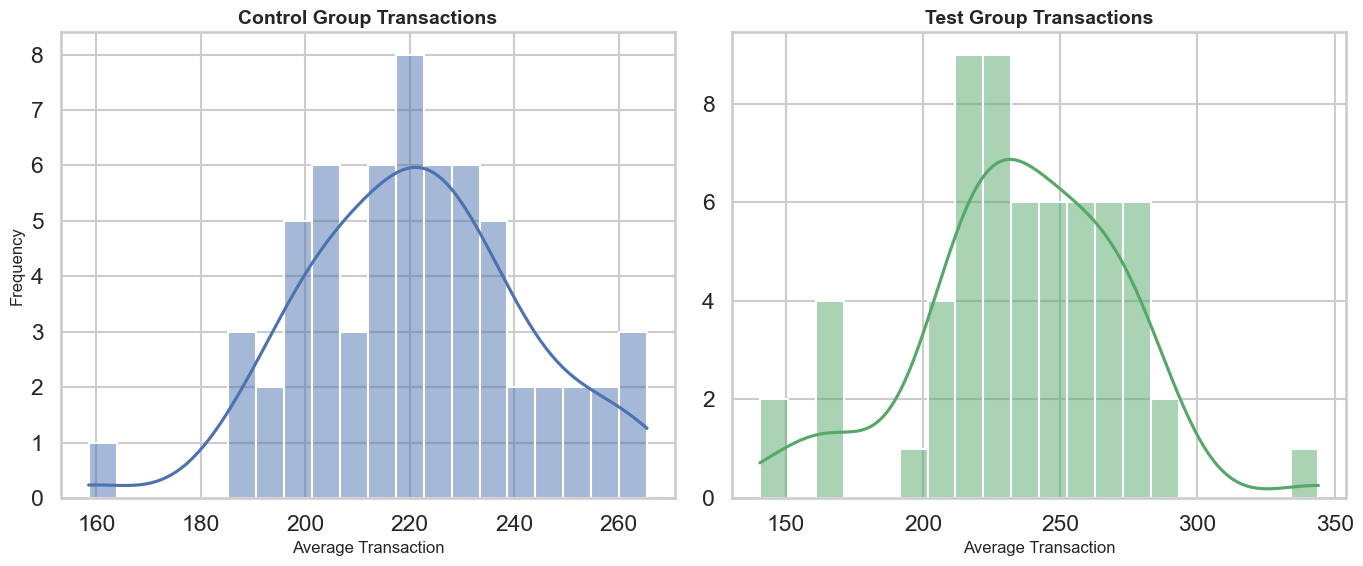

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- STYLE SETTINGS ---
sns.set_theme(style="whitegrid", context="talk")

# --- CREATE FIGURE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- HISTOGRAM 1: CONTROL GROUP ---
sns.histplot(
    data=df,
    x="control_group_avg_tran",
    bins=20,
    kde=True,
    color="#4C72B0",
    ax=axes[0]
)
axes[0].set_title("Control Group Transactions", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Average Transaction", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# --- HISTOGRAM 2: TEST GROUP ---
sns.histplot(
    data=df,
    x="test_group_avg_tran",
    bins=20,
    kde=True,
    color="#55A868",
    ax=axes[1]
)
axes[1].set_title("Test Group Transactions", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Average Transaction", fontsize=12)
axes[1].set_ylabel("")

# --- BEAUTIFY LAYOUT ---
plt.tight_layout()
plt.show()

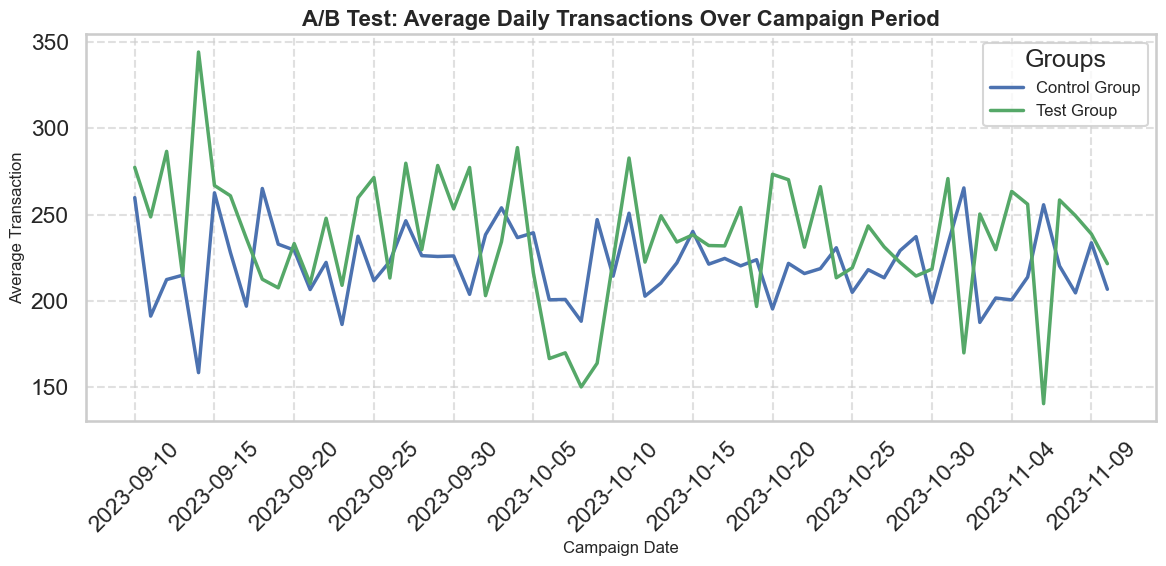

In [9]:
# --- STYLE SETTINGS ---
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

# --- LINE PLOT ---
sns.lineplot(
    data=df,
    x="campaign_date",
    y="control_group_avg_tran",
    label="Control Group",
    linewidth=2.5,
    color="#4C72B0",  # soft blue
)
sns.lineplot(
    data=df,
    x="campaign_date",
    y="test_group_avg_tran",
    label="Test Group",
    linewidth=2.5,
    color="#55A868",  # soft green
)

# --- AXIS AND LABELS ---
plt.title("A/B Test: Average Daily Transactions Over Campaign Period", fontsize=16, fontweight='bold')
plt.xlabel("Campaign Date", fontsize=12)
plt.ylabel("Average Transaction", fontsize=12)

# --- BEAUTIFY X-TICKS ---
plt.xticks(df["campaign_date"][::5], rotation=45)  # Show every 5th date
plt.tight_layout()

# --- LEGEND & GRID ---
plt.legend(title="Groups", frameon=True, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# --- SHOW PLOT ---
plt.show()


In [10]:
df[df.control_group_avg_tran > df.test_group_avg_tran]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [11]:
no_days = df[df.control_group_avg_tran > df.test_group_avg_tran].shape[0]
no_days

18

In [12]:
Percetage = no_days / df.shape[0]
Percetage

0.2903225806451613

<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">📊 Stage 4: Data Insights & Initial Observations</h1>

---


### 🧠 Key Insights

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
    
1. **Average Comparison:**  
   The **Test Group (₹235.98)** shows a slightly higher mean **Average Daily Transaction Value (ADTV)** than the **Control Group (₹221.18)** — a **~6.7% increase**.  
   While the difference is modest, it indicates a **positive direction** toward increased card usage after introducing the new credit card design.
    
2. **Distribution Patterns:**  
   Both groups display **similar transaction distributions**, as seen in the histograms.  
   The Test Group’s curve is **slightly wider**, indicating more variability — possibly due to a few high spenders responding to new incentives.

3. **Temporal Behavior:**  
   Across the 60-day campaign period, **transaction trends between groups overlap frequently**.  
   The Test Group consistently outperforms the Control Group on several peaks, suggesting occasional high-activity bursts post-intervention.

4. **Day-Level Comparison:**  
   On **18 out of 62 days (~29%)**, the **Control Group’s ADTV** was higher than the Test Group’s.  
   This means the **Test Group outperformed on ~70% of days**, reinforcing that the new design generally led to stronger engagement.
</div>

---

### 💡 Interpretation

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
    
Overall, the **Test Group** shows a **positive but moderate uplift** in average daily transaction values.  
The **new credit card design appears effective** in nudging users toward higher daily engagement and spending.  
However, the **effect size remains small**, and further testing or refinement may be needed to reach the targeted **20% uplift (MDE)** threshold.

</div>

<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">📊 🧮 Stage 5: Hypothesis Testing</h1>

---

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
 
In the previous stage, we observed that the **Test Group** showed a slightly higher **Average Daily Transaction Value (ADTV)** — ₹235.98 vs ₹221.18 for the **Control Group**, a ~6.7% uplift.  

While this difference appears promising, we now need to determine whether it is **statistically significant** — i.e., whether the observed uplift reflects a real behavioral change due to the new credit card design or simply occurred by random variation.

</div>

---

### 🧠 Hypothesis Definitions

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

- **Null Hypothesis (H₀):**  
  There is **no change** in the average daily transaction value per user.  
 
  H0 : Mean{treatment} = Mean{control}

- **Alternative Hypothesis (Hₐ):**  
  The new credit card design **increases** the average daily transaction value per user.  
 
  Ha: Mean{treatment} > Mean{control}


This is a **one-tailed test** since we are only interested in whether the new design leads to an **increase** (not just any difference) in user spending behavior.

</div>

---

### ⚙️ Statistical Testing Method

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

We use an **independent samples z-test** to compare the two group means.

- **Justification:**
  - Both samples (control & treatment) are **independent** and of roughly equal size (n = 62 each).  
  - Data represents **user-level aggregated means** — suitable for parametric testing.  
  - If the **variances differ significantly**, a **Welch’s z-test** variant is preferred for robustness.

</div>

---

### 🧩 Why This Step Matters

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
    
Visual trends (histograms and line charts) suggested that the **Test Group generally outperformed**  the Control Group, with **higher mean ADTV** and dominance on ~70% of campaign days.  

However, **visual differences alone don’t confirm statistical reliability**. The hypothesis test quantifies whether the uplift is large enough, relative to data variability, to be considered a **true behavioral effect** rather than random noise.

</div>

In [13]:
test_mean = df.test_group_avg_tran.mean()
test_std = df.test_group_avg_tran.std()
test_var = test_std**2
test_mean, test_std

(np.float64(235.9835483870968), np.float64(36.658082109186374))

In [14]:
control_mean = df.control_group_avg_tran.mean()
control_std = df.control_group_avg_tran.std()
control_var = control_std**2
control_mean, control_std

(np.float64(221.1751612903226), np.float64(21.35919211202701))

In [15]:
sample_size = df.shape[0]
sample_size

62

In [16]:
z_critical = st.norm.ppf(0.95)
z_critical

np.float64(1.6448536269514722)

In [17]:
Distribution_mean = 0
Distribution_std = np.sqrt((control_var/sample_size)+(test_var/sample_size))
z_score_sample = ((test_mean - control_mean)- Distribution_mean)/ Distribution_std
z_score_sample

np.float64(2.748297374569113)

In [18]:
print(f'''
Null Hypothesis: {z_score_sample < z_critical}
''')


Null Hypothesis: False



In [19]:
p_value = 1 - st.norm.cdf(z_score_sample)
p_value

np.float64(0.0029952824622024865)

In [20]:
print(f'''
Null Hypothesis: {p_value > alpha}
''')


Null Hypothesis: False



<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">🧾 Stage 5: Hypothesis Test Results & Business Interpretation </h1>

---

### 📊 Interpretation

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">
    
- The **Z-Score (2.75)** is **greater** than the **Z-Critical value (1.64)**, and the **p-value (0.0029)** is **well below the 0.05 threshold**.

- This means we **reject the null hypothesis (H₀)** and **accept the alternative hypothesis (Hₐ)**.

</div>

---

### 💡 What This Means in Business Terms

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

1. **Statistical Significance Achieved:**  
   The increase in **Average Daily Transaction Value (ADTV)** observed for the **Test Group** is **not random** — it’s a **real effect** of the new credit card design.

2. **Positive Uplift Detected:**  
   Users in the **Test Group** spent **approximately ₹15 more per day on average** (a **6.7% increase**) compared to those in the control group.

3. **Confidence in Experiment:**  
   With a **p-value of 0.0029**, there is **over 99% confidence** that this uplift is genuine and repeatable, not due to sampling noise.

4. **Business Impact:**  
   Even a modest daily uplift like this can **compound significantly** at scale — when rolled out to thousands of users, it translates into a **substantial gain in transaction volume and interchange revenue**.

</div>


In [21]:
z_score_95_confidence = st.norm.ppf(0.975)
z_score_95_confidence

np.float64(1.959963984540054)

In [22]:
absolute_mean_difference = test_mean - control_mean
absolute_mean_difference

np.float64(14.808387096774197)

In [23]:
diff_upper_limit = absolute_mean_difference + (z_score_95_confidence*Distribution_std)
diff_lower_limit =  absolute_mean_difference - (z_score_95_confidence*Distribution_std)
diff_lower_limit, diff_upper_limit

(np.float64(4.247701179968875), np.float64(25.36907301357952))

In [24]:
percentage_increase = (diff_lower_limit*100/control_mean, diff_upper_limit*100/control_mean)
percentage_increase

(np.float64(1.9205145619372632), np.float64(11.470127506894478))

<h1 style="color:#1f77b4; text-align:center; font-size:2.2em;">🚀 Stage 6: Launch Decision Strategy (Business Summary)</h1>

---

### 🧾 What We Did

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

We tested if the **new credit card design** helped users spend more on a daily basis.

- **Control Group Average:** ₹221.18  
- **Test Group Average:** ₹235.98  
- **Observed Lift:** +6.7%  
- **95% Confidence Interval:** [1.9%, 11.5%]  
- **P-value:** 0.0029 → Statistically significant  

This means the new design **did increase spending**, and the result is **real (not random)**.

</div>
    
---

### 💡 What It Means

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

- The uplift in spending is **between 2% and 11.5%**.  
- So, even in the worst case, users spent **a little more**, and in the best case, **a lot more**.  
- But our **business target** (practical significance) is **10% uplift**, the level at which it clearly impacts revenue meaningfully.  
- Our test’s **average uplift (6.7%)** is **below** that target — good progress, but not strong enough for a full launch yet.

</div>
                                                                                                       
---

### 🎯 Final Recommendation

<div style="border-left: 5px solid #1f77b4; padding-left: 15px; margin-bottom: 15px;">

1. **Keep the new design** – it’s working.  
2. **Add stronger incentives** (e.g., better cashback or e-commerce perks).  
3. **Rerun the experiment** with more users or for a longer period (e.g., 90 days) to get a clearer result.  
4. If uplift stays **above 10%**, **go for a full-scale launch**.

</div>
                                    
---

### 🏁 In Simple Words
          
> The new card design is **doing better** than the old one — users are spending more.  
> But the increase is **not big enough yet** to justify a full rollout.  
> Let’s **improve it a bit and rerun the test** before launching nationwide.
